In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel('Dataset.xlsx',sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [10]:
df1=df.copy()  


In [11]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [12]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [13]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


In [15]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i]=df[i].fillna(df[i].median())
df.isnull().sum()
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Treating outliers

Text(0, 0.5, 'Values')

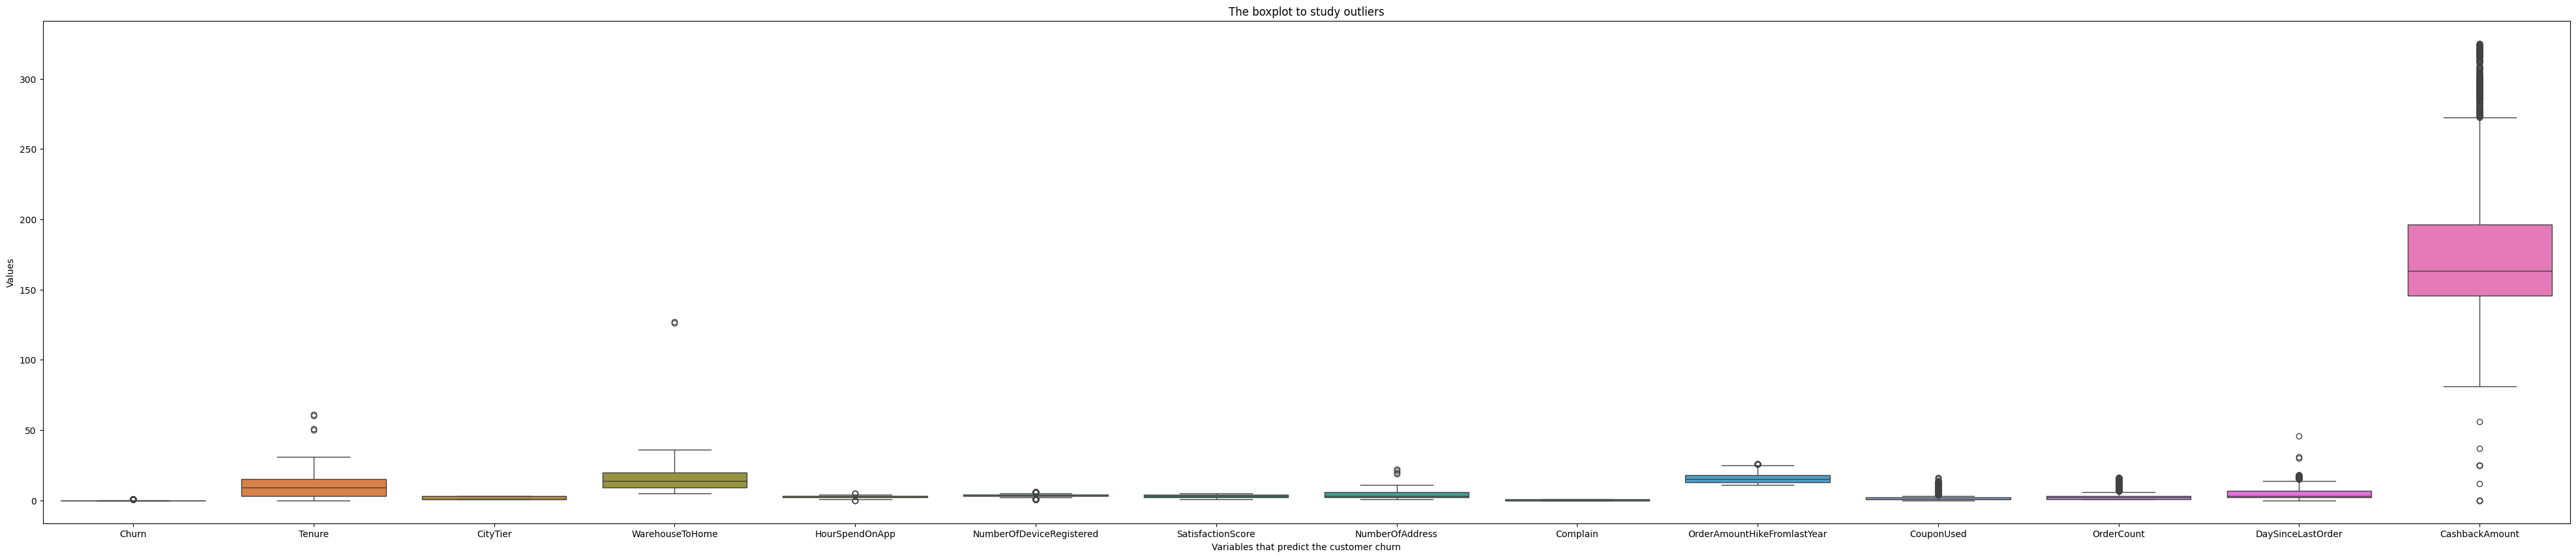

In [16]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

after checking outliers now we remove those outliers

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [18]:
for column in df.columns:
    if df[column].dtype !='object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Now plotting again 

Text(0, 0.5, 'Values')

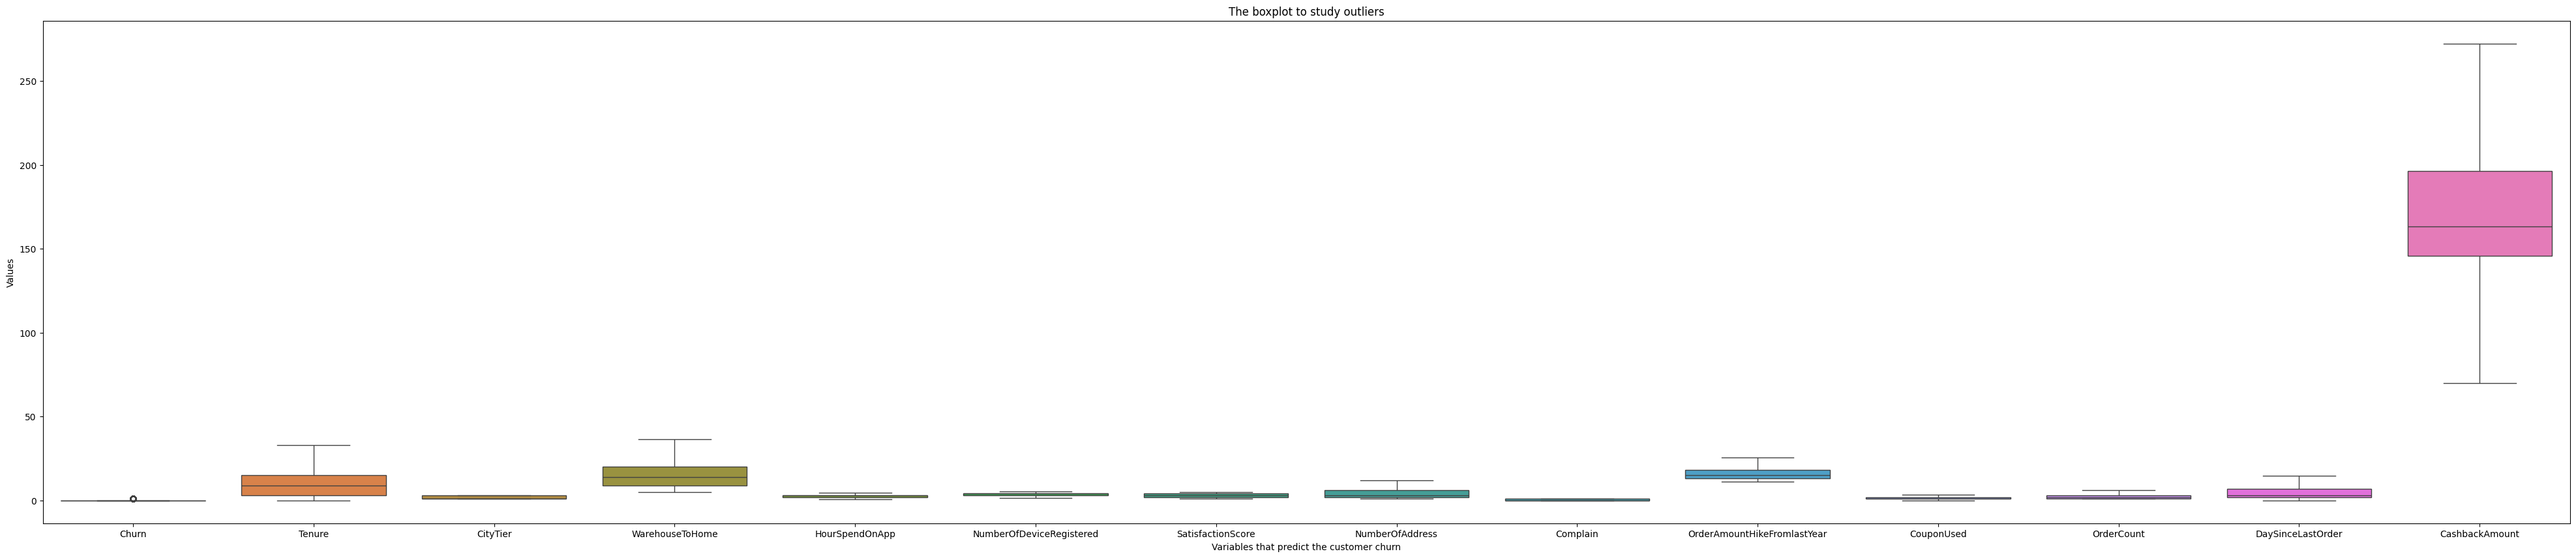

In [19]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

##Adding a new variable 
cashback per order -> cashbackamout+ordercount

In [20]:
df['avg_cashbk_per_order']=df['CashbackAmount']/df['OrderCount']

In [21]:
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)
print(Churn_perc)


20.25


## Data Analysis 
1) univariate analysis

In [22]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [23]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [24]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


CityTier

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [25]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'avg_cashbk_per_order'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

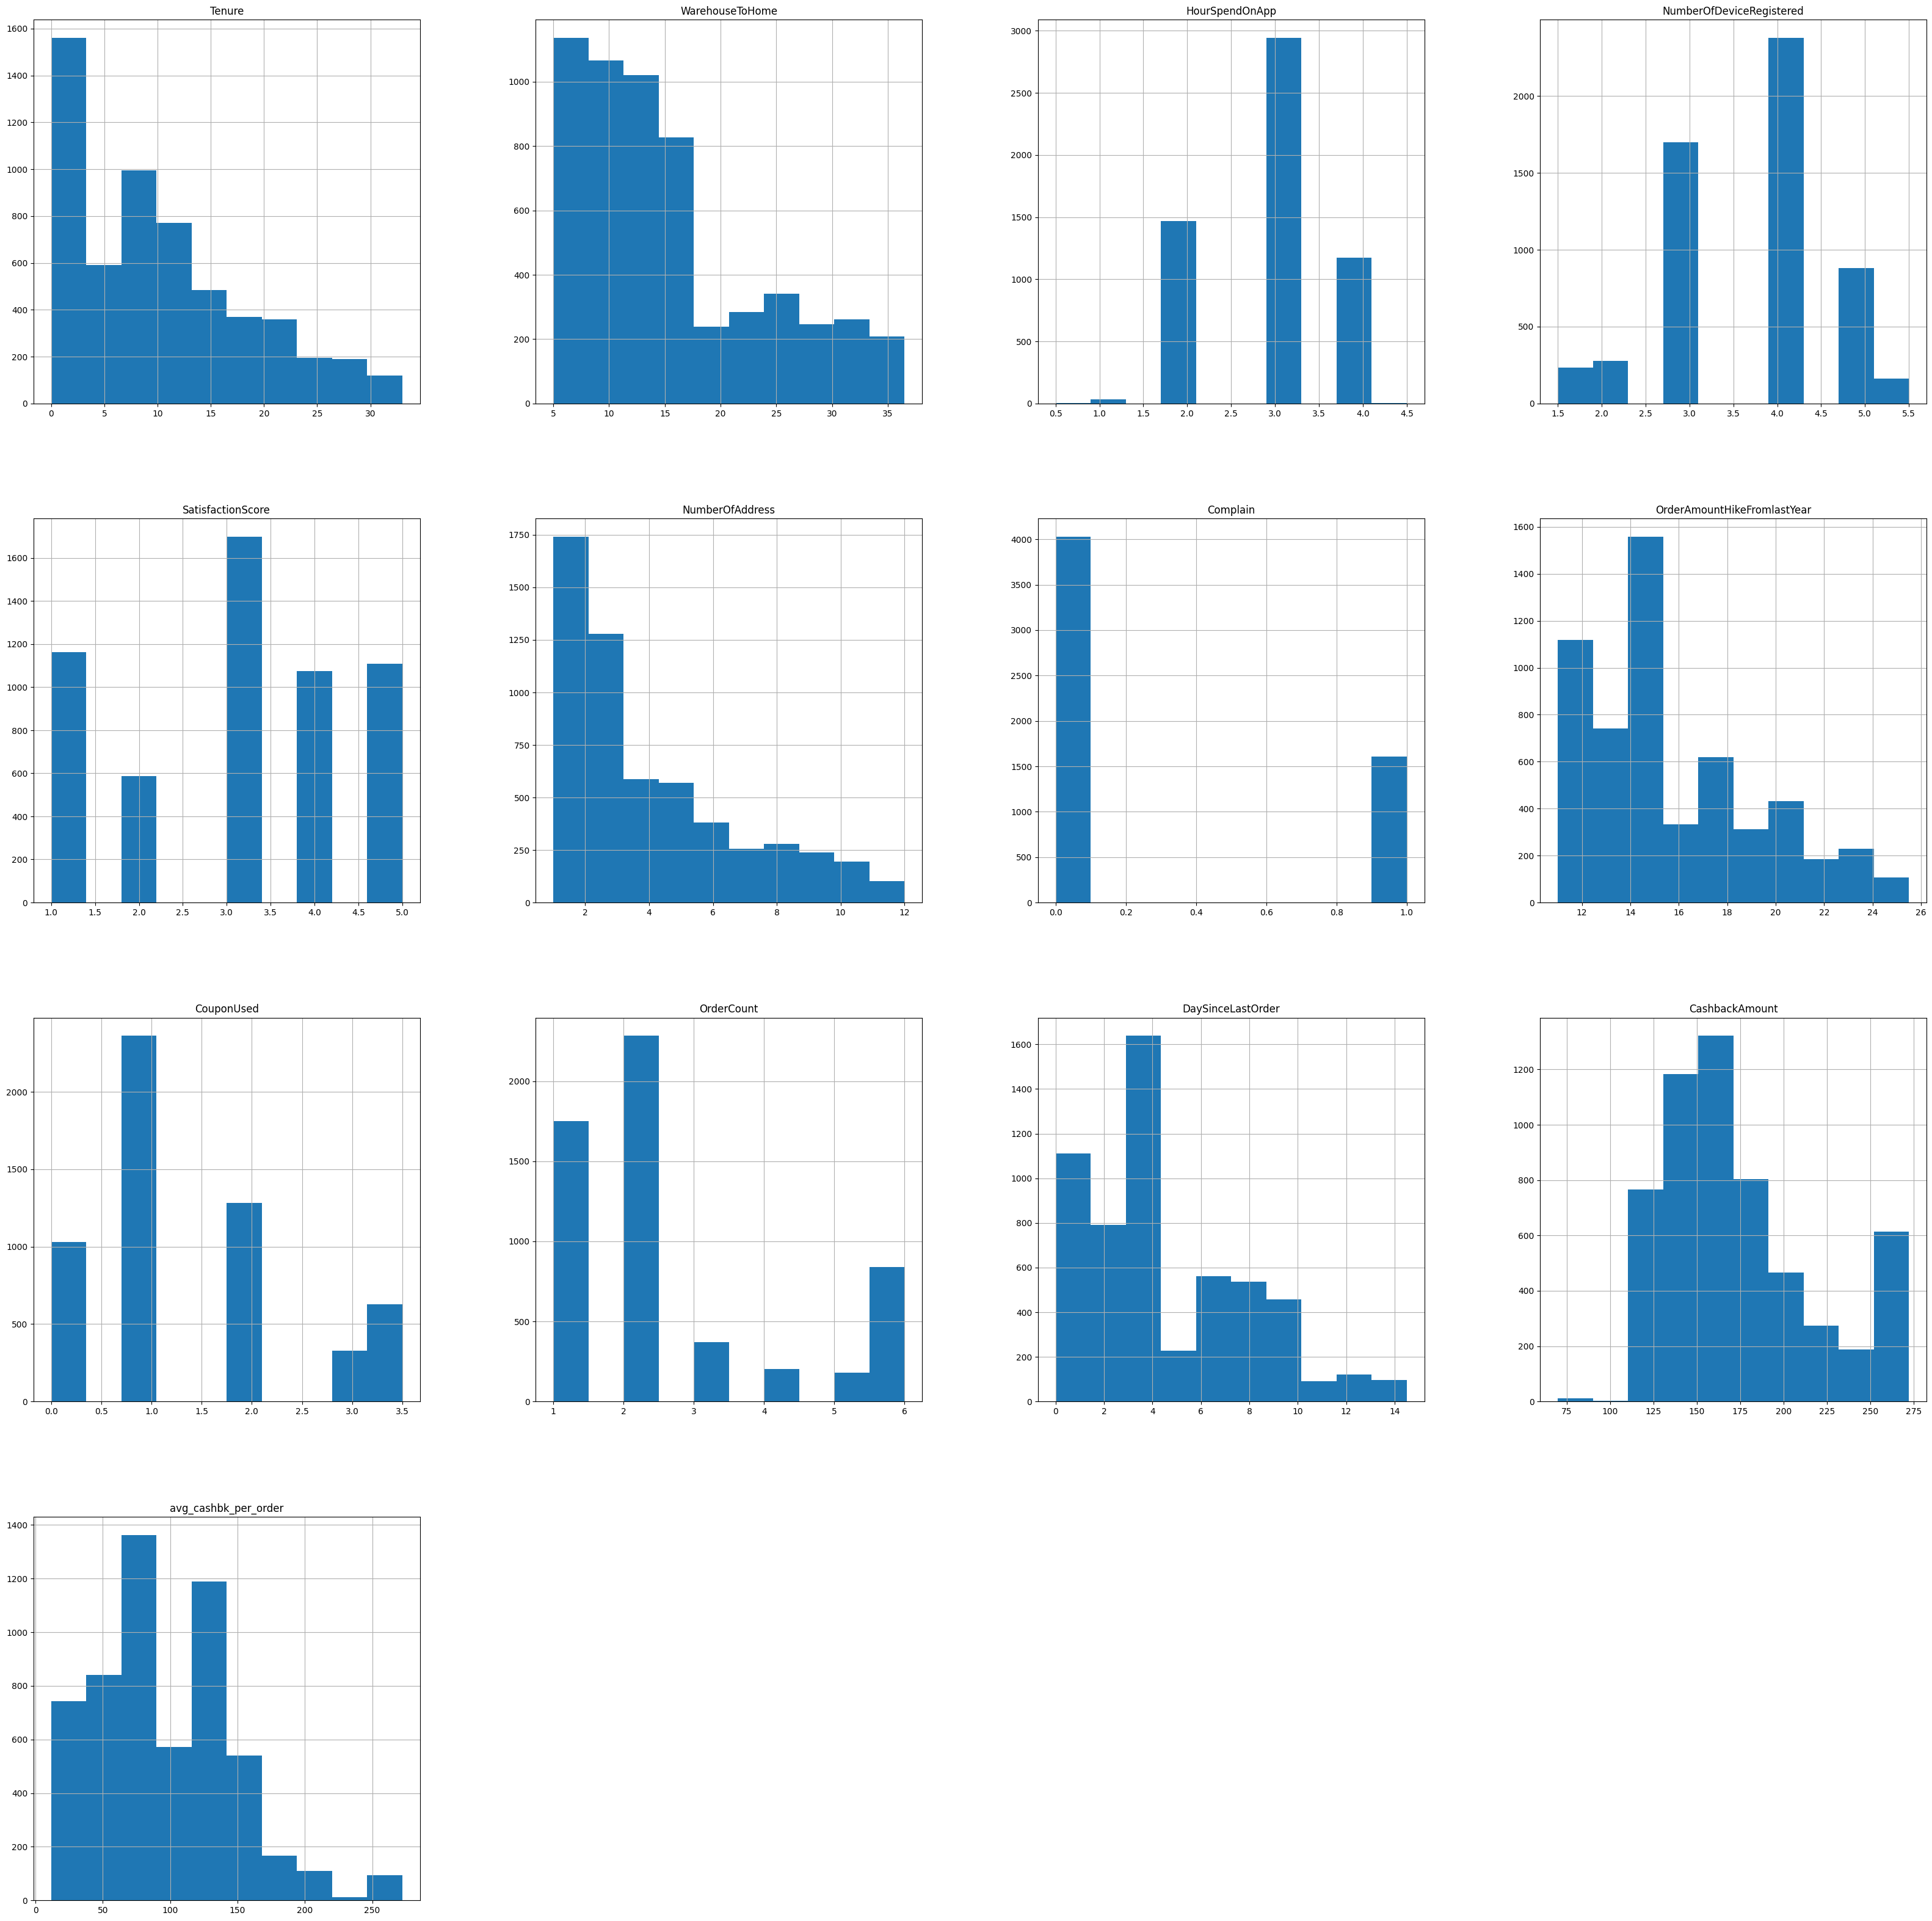

In [26]:
df[num].hist(figsize=(40,40))

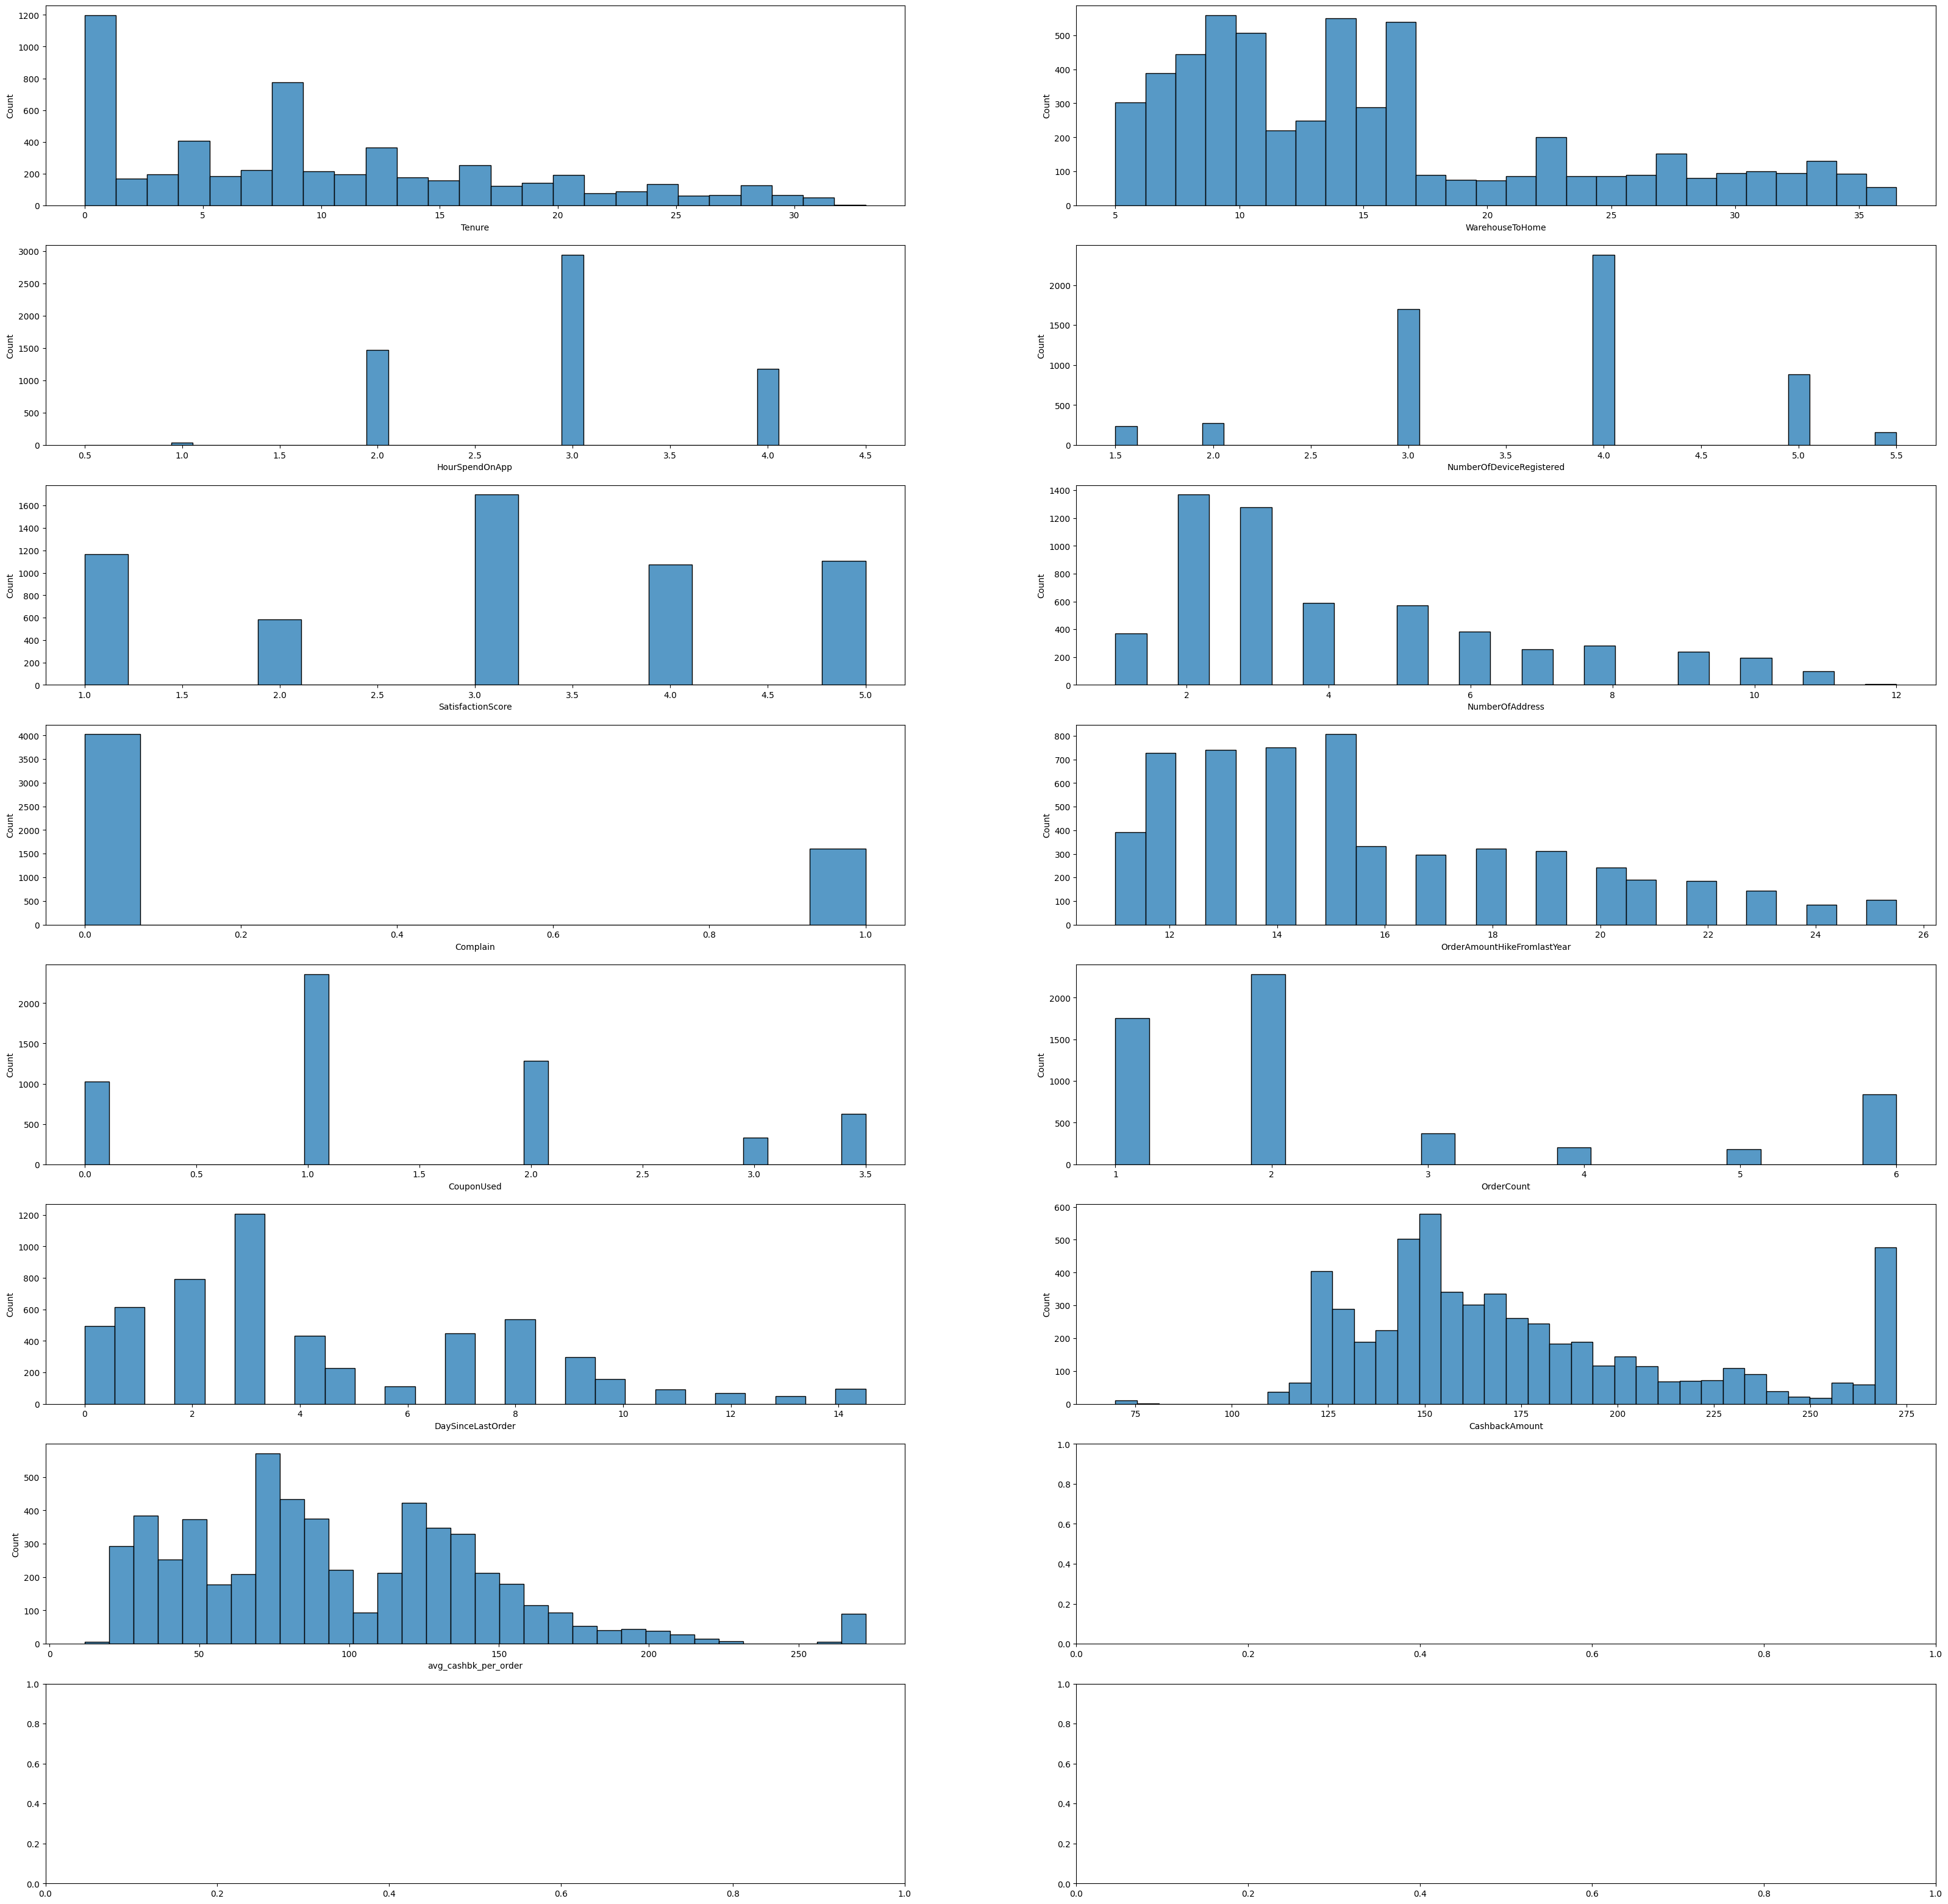

In [27]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], ax=subplot)

##Analysing churn by each variable

In [28]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [ ]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),round(df.groupby(i).Churn.sum()*100/df[i].value_counts(),2)], axis=1)


In [50]:
#inserting indexes for d
for i in df.columns:
    d[i].reset_index(level=0,inplace=True)
for i in df.columns:
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [49]:
for i in df.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn Total_Customers Total_Customers  count perc_of_total_cust
0      0               0               0   4682                0.0
1      1               1             948    948              100.0

Tenure
    Tenure  Total_Customers Churn  count perc_of_total_cust
0        0              0.0   272    508          53.543307
1        1              1.0   349    690           50.57971
2        2              2.0    14    167           8.383234
3        3              3.0    18    195           9.230769
4        4              4.0    20    203           9.852217
5        5              5.0    16    204           7.843137
6        6              6.0     8    183           4.371585
7        7              7.0    16    221           7.239819
8        8              8.0    16    263            6.08365
9        9              9.0    93    511          18.199609
10      10             10.0    14    213            6.57277
11      11             11.0    10    194           5.154639
12   

## Analysing churn by each variable --by visualising via graphs

In [41]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

In [35]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

<Figure size 2000x1200 with 0 Axes>

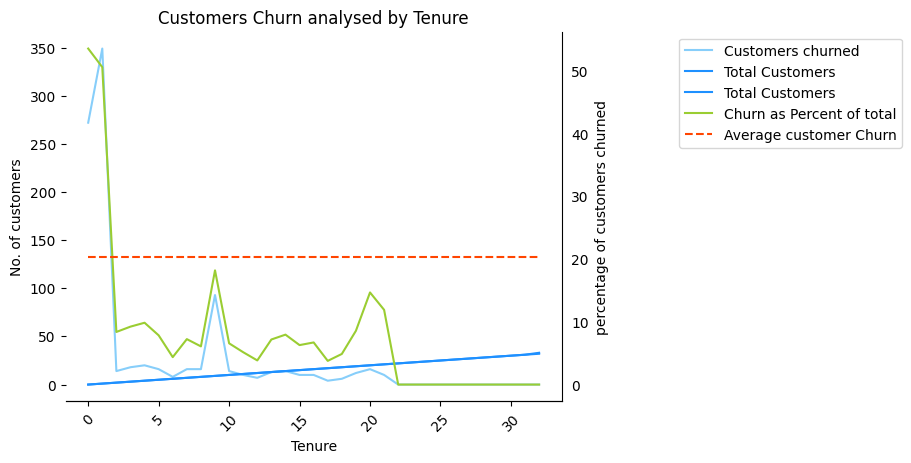

In [51]:
analysis_chart('Tenure')